# What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) is a step in the data analysis process that involves the initial investigation and visualization of a dataset to discover patterns, spot anomalies, and generally, gain insights into the underlying structure of the data.

Key aspects of Exploratory Data Analysis include:

1. **Descriptive Statistics:**
   - Descriptive statistics summarizes and describes essential features of a dataset, providing a clear and concise overview of the main characteristics.

2. **Data Visualization:**
   - Visualization techniques are used to represent the data graphically to understand the distribution of the data and identify patterns, trends, and potential relationships between variables.

3. **Outlier Analysis:**
   - Identification and examination of outliers that may significantly impact the analysis or provide valuable insights into the data.

4. **Analyzing Relationships:**
   - Examining relationships between variables by conducting statistical tests and utilizing metrics that quantify the strength of these relationships. This process entails a deep understanding of how changes in one variable correspond to changes in another, contributing to a comprehensive exploration of inter-variable dynamics.

# Descriptive Statistics

The `describe()` function in the Pandas library in Python is a powerful tool for obtaining descriptive statistics of both numerical and categorical variables in a DataFrame.

- The output for numerical variables will include the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

- The output for categorical variables will include the count, unique values, top (most frequent value), and frequency of the top value.

In [1]:
import pandas as pd
url = 'https://drive.google.com/file/d/19aYZVyCsbKp0UEQl8QQagKyHFmromwQg/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,two
1,10.34,1.66,Male,No,Sun,Dinner,three
2,21.01,3.50,Male,No,Sun,Dinner,three
3,23.68,3.31,Male,No,Sun,Dinner,two
4,24.59,3.61,Female,No,Sun,Dinner,four


In [3]:
df.describe(include='number')

,total_bill,tip
count,241.000000,243.000000
mean,19.809419,2.998272
std,8.955254,1.386494
min,3.070000,1.000000
25%,13.280000,2.000000
50%,17.780000,2.880000
75%,24.270000,3.575000
max,50.810000,10.000000


In [3]:
df.describe(include='object')

,sex,smoker,day,time,size
count,243,243,241,243,243
unique,2,2,4,2,6
top,Male,No,Sat,Dinner,two
freq,156,150,86,175,156


# Data Visualization

While descriptive statistics offer a quantitative summary of data, data visualization enhances understanding, aids exploration, facilitates communication, and provides a more holistic perspective on the underlying patterns and trends within the data. The combination of descriptive statistics and visualization is a powerful approach for gaining comprehensive insights from data.

Here are some reasons why data visualization is needed alongside descriptive statistics:

1. **Enhanced Understanding:**
   - Visualization provides a graphical representation of data, making it easier for individuals to grasp complex patterns, trends, and relationships. It adds a visual context that descriptive statistics alone may not convey as effectively.

2. **Communication:**
   - Visualizations are powerful tools for conveying insights to a diverse audience who may not be familiar with statistical terminology. Compelling visuals can make data-driven narratives more accessible and persuasive.

4. **Comparisons and Contrasts:**
   - Visualizations make it easy to compare multiple datasets or variables simultaneously. Side-by-side visual representations provide a quick way to identify differences or similarities, aiding in the decision-making process.

4. **Storytelling:**
   - Data visualizations enable the creation of compelling narratives. By combining descriptive statistics with visuals, analysts can tell a cohesive story about the data, leading to a more comprehensive and memorable understanding of the insights.

5. **Interactive Exploration:**
   - Interactive visualizations allow users to explore the data dynamically. Users can interact with charts, zoom in on specific data points, and filter information, fostering a more hands-on and engaging data exploration experience.

### Some common visualizations

#### Scatter Plot

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional plane where each point on the plot represents the values of **two different variables**.

Scatter plots are useful for examining the relationship between two variables to identify patterns, trends, or correlations in the data.

Key features of a scatter plot include:

1. **X and Y Axes:** The x and y axis in a scatterplot represent one of the variables being measured.

2. **Data Points:** Each data point in a scatterpolot correspond to a specific set of values for the two variables.

3. **Markers:** Each data point is represented by a marker, such as a dot, circle, or other symbol, making it easier to distinguish and identify individual points.

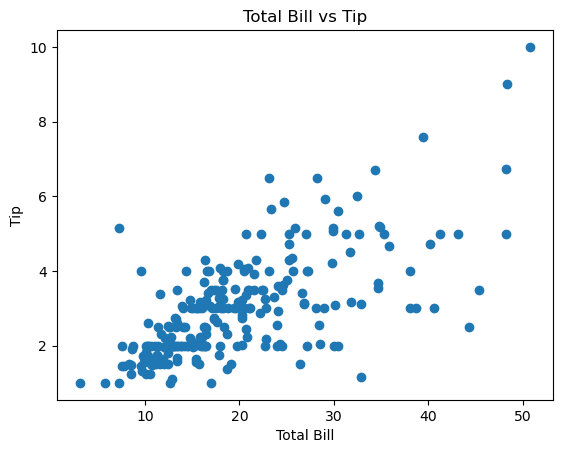

In [4]:
import matplotlib.pyplot as plt

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Plot the data as scatter points
ax.scatter(df['total_bill'], df['tip'])
ax.set_title("Total Bill vs Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

# Show the plot
plt.show()

# You can add another feature to this plot

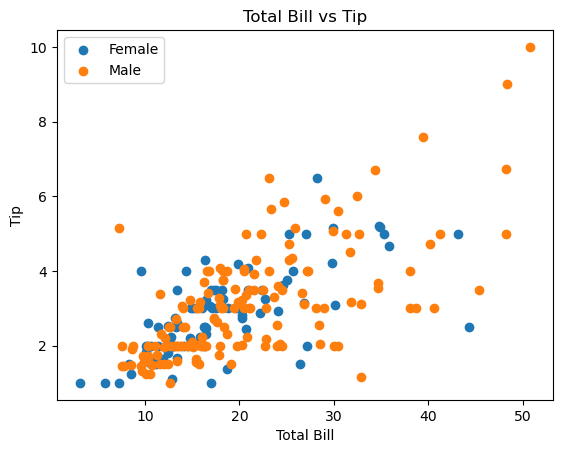

In [5]:
import matplotlib.pyplot as plt


# Modify 'sex' with the actual column name representing groups in your dataframe
df['sex'].fillna(df['sex'].mode()[0], inplace=True) #mode of the 'sex' column, which is the most frequently occurring value and [0] index is used to select the first mode (the most frequent value)
groups = df['sex'].unique()

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Plot the data as scatter points for each group
for group in groups:
    group_data = df[df['sex'] == group]
    ax.scatter(group_data['total_bill'], group_data['tip'], label=group)

# Set title and labels
ax.set_title("Total Bill vs Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

# Add legend
ax.legend()

# Show the plot
plt.show()


The scatterplot illustrates a discernible pattern: as the total bill increases, there is a corresponding increase in tips. This suggests a positive correlation between the two variables, indicating that customers tend to leave higher tips when their total bill is higher.

#### Bar Chart

A bar chart is a graphical representation of data using rectangular bars to show the **values of different categories**, making it easy to compare and visualize the distribution of the data.

Key components of a bar chart include:

1. **Categories or Groups:** The x-axis of the bar chart typically represents different categories or groups. Each category is associated with a bar.

2. **Bars:** The y-axis of the bar chart represents the **values or counts** associated with each category.

3. **Height of Bars:** The height of each bar indicates the quantity, frequency, or value of the data point associated with the category.

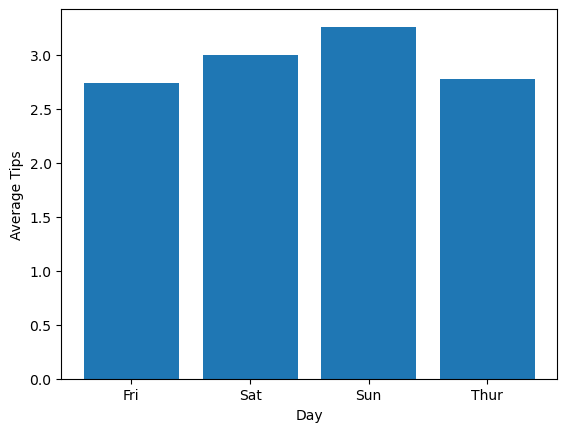

In [6]:
import matplotlib.pyplot as plt

# Create a Figure and Axes object
fig, ax = plt.subplots()
average_tip_by_day=df.groupby('day')['tip'].mean() #The result is a Series with the average tips for each day.
categories=average_tip_by_day.index
values=average_tip_by_day.values

# Plot the data 
ax.bar(categories, values)
ax.set_xlabel("Day")
ax.set_ylabel("Average Tips")
# Show the plot
plt.show()

The bar chart provides insights into tipping patterns, indicating a distinct trend of higher average tips on Sundays compared to the remaining days of the week. Specifically, the average tip amount on Sundays is approximately $3.

#### Histogram


A histogram is a graphical representation of the distribution of a dataset. It displays the frequencies of observations within different intervals or bins. Histograms are commonly used to understand the **shape of the data distribution**, identify patterns, and detect outliers.

Key components of a histogram include:

1. **Bins:** The range of values in the dataset is divided into intervals called bins.

2. **X-Axis:** The x-axis represents the bins or intervals of the data.

3. **Y-Axis:** The y-axis represents the frequency or count of data points within each bin.

4. **Bars:** Each bar in the histogram corresponds to a bin and represents the count or frequency of data points within that bin.

Some Common Shapes of Data Distributions:



1. **Symmetric (Normal) Distribution:**
   - In a symmetric distribution, the left and right sides of the histogram are mirror images of each other.
   - The mean, median, and mode are approximately equal.

2. **Skewed Right (Positively Skewed) Distribution:**
   - The right tail of the histogram is longer or fatter than the left.
   - The mean is greater than the median.

3. **Skewed Left (Negatively Skewed) Distribution:**
   - The left tail of the histogram is longer or fatter than the right.
   - The mean is less than the median.
4. **Uniform Distribution:**
   - In a uniform distribution, all values or intervals have approximately the same frequency.

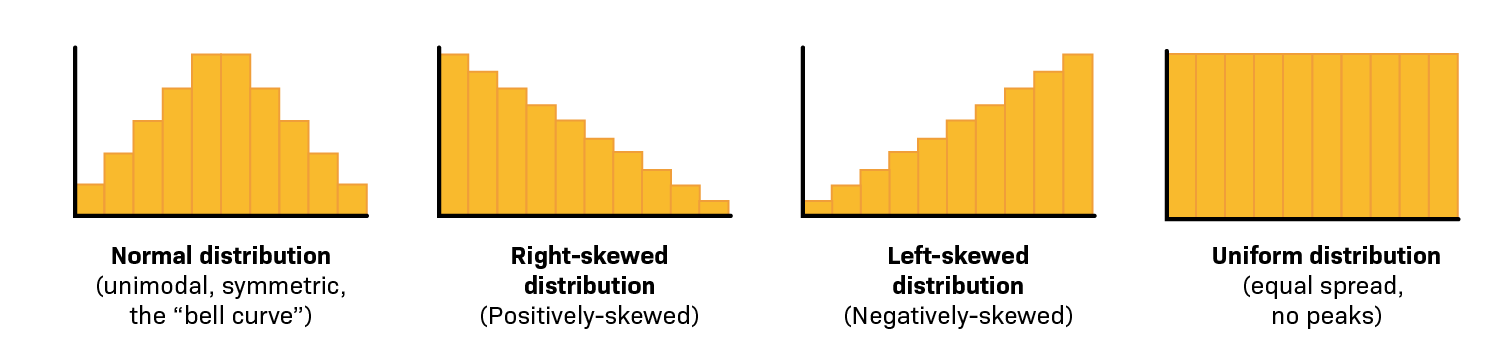

Source: https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1

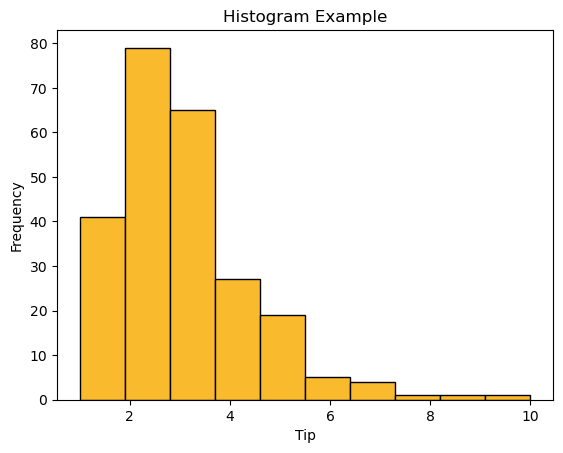

In [7]:
# Create a Figure and Axes object
fig, ax = plt.subplots()

# Plot the data as a histogram
ax.hist(df['tip'], bins=10, color='#F9BA2D', edgecolor='black')

# Add title and labels
ax.set_title('Histogram Example')
ax.set_xlabel('Tip')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


#### Box Plot

A box plot, also known as a box-and-whisker plot, is a graphical representation that provides a summary of the distribution. It displays the distribution of data along a single axis and is particularly useful for comparing the spread and central tendency of different groups or datasets.

Here are the key components of a box plot:

1. **Box:**
   - The box represents the interquartile range (IQR), which is the middle 50% of the data. It spans from the first quartile (Q1) to the third quartile (Q3).
   - The length of the box indicates the spread or variability within the middle 50% of the data.
   - The line inside the box represents the median (Q2), which is the middle value when the dataset is ordered.

2. **Whiskers:**
   - The whiskers extend from the box to the minimum and maximum values within a certain range. The range is often calculated as $1.5 \times \text{IQR}$.
   - Any data points beyond the whiskers are considered outliers and are plotted individually.

3. **Outliers:**
   - Individual data points beyond the whiskers are plotted as dots and are considered potential outliers.

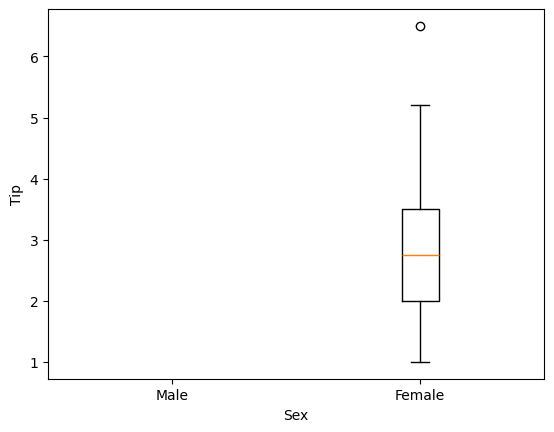

In [9]:
import matplotlib.pyplot as plt
 
male_data= df[df['sex'] == 'Male']['tip']
female_data= df[df['sex'] == 'Female']['tip']

fig, ax = plt.subplots()
ax.set_xlabel("Sex")
ax.set_ylabel("Tip")
ax.boxplot([male_data,female_data], labels=['Male', 'Female'])
plt.show()

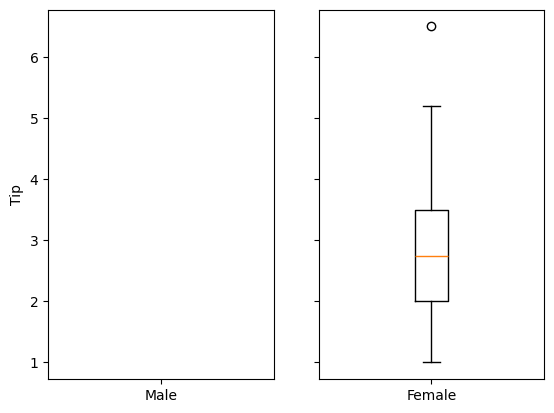

In [8]:
fig, axes = plt.subplots(1,2,sharey=True)
axes[0].boxplot(male_data, labels=['Male'])
axes[1].boxplot(female_data, labels=['Female'])
axes[0].set_ylabel("Tip")
plt.show()

# Visualizing High Dimensional Data

Many real-world datasets involve a large number of features or dimensions. Visualizing data in high-dimensional space is challenging, and it becomes difficult to gain insights into the structure of the data as humans are limited in their ability to visualize data in more than three dimensions. Dimensionality reduction allows for projection of high-dimensional data onto a 2D or 3D space, making it visually interpretable while retaining **important patterns and relationships**.

### t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a data visualization technique that helps us understand and explore high-dimensional datasets in a simpler way. In simple terms, t-SNE takes a set of points in a high-dimensional space (where each dimension represents a feature) and maps them to a lower-dimensional space, often 2D or 3D, while preserving the relationships between the points as much as possible.

Here's a simple example using Python and the scikit-learn library:

(150, 4)
(150, 2)
['setosa' 'versicolor' 'virginica']


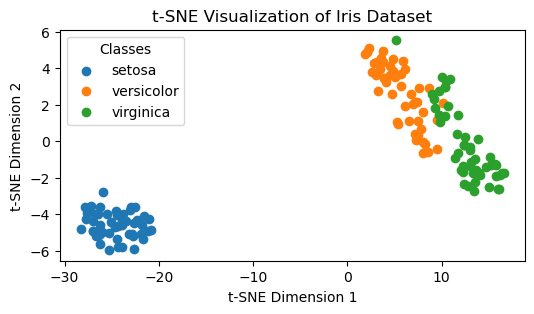

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn import datasets
import matplotlib.pyplot as plt

# Load iris dataset
df = datasets.load_iris()
print(df.data.shape)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)# n_components specifies the number of dimensions in the reduced space (here, set to 2)
df_tsne = tsne.fit_transform(df.data)
print(df_tsne.shape)
print(df.target_names)

# Plot the t-SNE representation with legend
plt.figure(figsize=(6, 3))

# Plot each class separately to assign labels for legend
for target in np.unique(df.target):
    indices = df.target == target
    plt.scatter(df_tsne[indices, 0], df_tsne[indices, 1], label=df.target_names[target])

# Set labels and title
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Add legend
plt.legend(title="Classes")

# Show the t-SNE plot
plt.show()
